# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

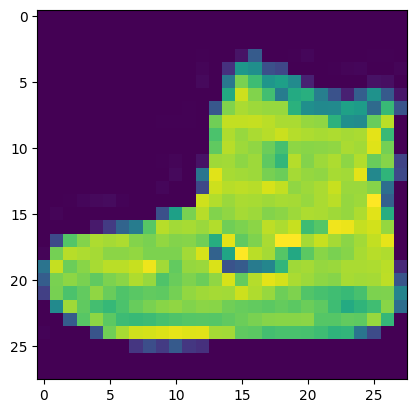

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [3]:
import tensorflow as tf

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [4]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

**Преобразуйте  y_train и y_test в one_hot представления**

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [8]:
initial_weights = model.layers[0].get_weights()[0] # пригодится после
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4134 - accuracy: 0.8522
Epoch 2/2
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2810 - accuracy: 0.8983


### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.2923 - accuracy: 0.8967
Accuracy: 0.8967000246047974


In [10]:
from sklearn.metrics import classification_report
import numpy as np

predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred)
print(report)

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.80      0.83      1000
           3       0.86      0.94      0.90      1000
           4       0.84      0.83      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.62      0.69      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

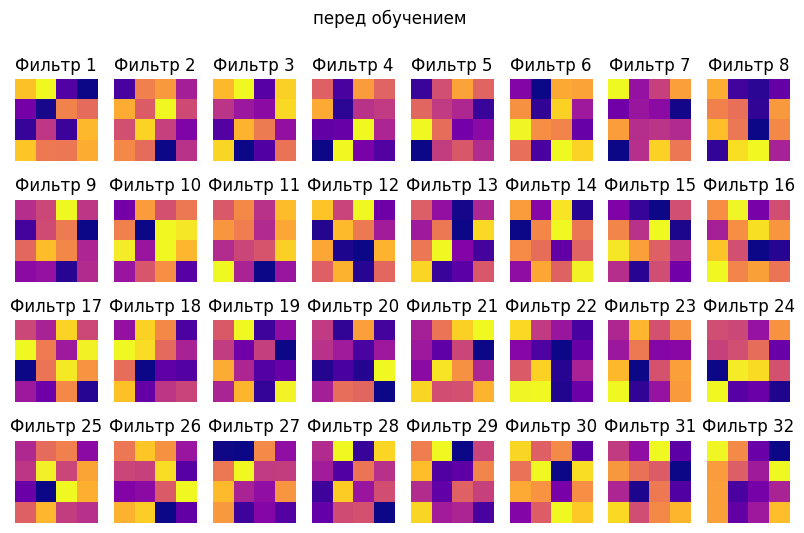

In [16]:
plt.figure(figsize=(10, 6))

for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(initial_weights[:, :, 0, i], cmap='plasma')
    plt.axis('off')
    plt.title(f'Фильтр {i + 1}')

plt.suptitle('перед обучением')
plt.show()

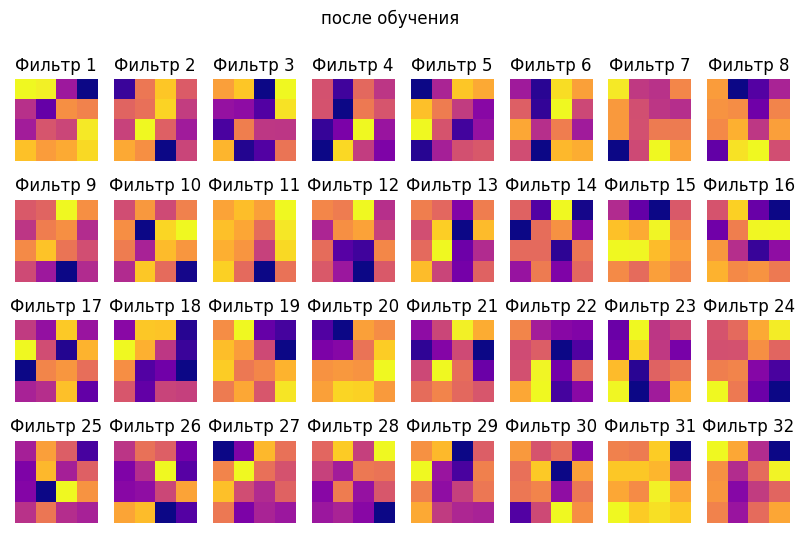

In [17]:
trained_weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 6))

for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(trained_weights[:, :, 0, i], cmap='plasma')
    plt.axis('off')
    plt.title(f'Фильтр {i + 1}')

plt.suptitle('после обучения')
plt.show()